Data Analyst Intern Assignment

In [5]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
# Set seaborn theme
sns.set_theme(style="whitegrid")

In [7]:
# 2. Load Data
students = pd.read_csv("students.csv")
course_activity = pd.read_csv("course_activity.csv")
feedback = pd.read_csv("feedback.csv")

In [8]:
# 3. Data Cleaning & Preparation

# Convert date columns to datetime format
students['Enrolment_Date'] = pd.to_datetime(students['Enrolment_Date'], format="%d/%m/%Y")
course_activity['Date'] = pd.to_datetime(course_activity['Date'], format="%d/%m/%Y")

In [9]:
# Drop duplicate records if any
students.drop_duplicates(inplace=True)
course_activity.drop_duplicates(inplace=True)
feedback.drop_duplicates(inplace=True)

In [10]:
# Check for missing values
print("Missing Values Check:")
print("Students:\n", students.isnull().sum())
print("Course Activity:\n", course_activity.isnull().sum())
print("Feedback:\n", feedback.isnull().sum())

Missing Values Check:
Students:
 Student_ID        0
Name              0
Age               0
Gender            0
Location          0
Enrolment_Date    0
dtype: int64
Course Activity:
 Student_ID               0
Course_ID                0
Date                     0
Time_Spent_Minutes       0
Completion_Percentage    0
dtype: int64
Feedback:
 Student_ID       0
Course_ID        0
Rating           0
Feedback_Text    0
dtype: int64


In [11]:
# 4. Exploratory Data Analysis (EDA)

# Overall average completion rate
avg_completion = course_activity['Completion_Percentage'].mean()
print(f"\nOverall average course completion rate: {avg_completion:.2f}%")


Overall average course completion rate: 54.78%


In [12]:
# Course with highest and lowest average engagement time
engagement_by_course = course_activity.groupby('Course_ID')['Time_Spent_Minutes'].mean().sort_values()
print("\nLowest Avg Time Spent:")
print(engagement_by_course.head(1))
print("\nHighest Avg Time Spent:")
print(engagement_by_course.tail(1))


Lowest Avg Time Spent:
Course_ID
PY202    93.902439
Name: Time_Spent_Minutes, dtype: float64

Highest Avg Time Spent:
Course_ID
DM101    102.427673
Name: Time_Spent_Minutes, dtype: float64


In [13]:
# Engagement by Age Group and Location
# Merge student demographics with activity data
merged = pd.merge(course_activity, students, on="Student_ID")

In [14]:
# Create age groups
merged['Age_Group'] = pd.cut(merged['Age'], bins=[15, 25, 35, 45, 60], labels=["15-25", "26-35", "36-45", "46+"])

In [15]:
# Engagement by Location
engagement_by_location = merged.groupby('Location')['Time_Spent_Minutes'].mean().sort_values(ascending=False)
print("\nEngagement by Location:\n", engagement_by_location)


Engagement by Location:
 Location
Kolkata      104.384615
Delhi        103.302857
Bangalore     98.000000
Mumbai        95.435484
Chennai       90.946746
Name: Time_Spent_Minutes, dtype: float64


In [16]:
# Average feedback rating per course
avg_rating = feedback.groupby("Course_ID")['Rating'].mean().sort_values(ascending=False)
print("\nAverage Rating per Course:\n", avg_rating)


Average Rating per Course:
 Course_ID
PY202    3.277778
UX303    2.923077
DM101    2.900000
WD404    2.789474
Name: Rating, dtype: float64


In [22]:
# Correlation between completion rate and feedback rating
# Merge course activity with feedback
activity_feedback = pd.merge(course_activity, feedback, on=["Student_ID", "Course_ID"])
merged = pd.merge(course_activity, students, on="Student_ID")

# Create age group bins
merged['Age_Group'] = pd.cut(merged['Age'], bins=[15, 25, 35, 45, 60], labels=["15-25", "26-35", "36-45", "46+"])

# Calculate average time spent by age group
engagement_by_age = merged.groupby('Age_Group')['Time_Spent_Minutes'].mean()

C:\Users\jeeve\AppData\Local\Temp\ipykernel_9140\3663303958.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  engagement_by_age = merged.groupby('Age_Group')['Time_Spent_Minutes'].mean()


In [18]:
# Compute correlation
correlation = activity_feedback[['Completion_Percentage', 'Rating']].corr().iloc[0,1]
print(f"\nCorrelation between completion rate and feedback rating: {correlation:.2f}")


Correlation between completion rate and feedback rating: -0.05


In [19]:
# Identify top 3 student segments based on engagement & satisfaction
feedback_avg = feedback.groupby("Student_ID")['Rating'].mean().reset_index(name="Avg_Rating")
engagement_avg = course_activity.groupby("Student_ID")['Time_Spent_Minutes'].mean().reset_index(name="Avg_Engagement")
segment_df = pd.merge(feedback_avg, engagement_avg, on="Student_ID")
top_segments = segment_df.sort_values(by=["Avg_Rating", "Avg_Engagement"], ascending=False).head(3)
print("\nTop 3 Engaged & Satisfied Students:\n", top_segments)


Top 3 Engaged & Satisfied Students:
    Student_ID  Avg_Rating  Avg_Engagement
60       S077         5.0      140.125000
23       S036         5.0      123.400000
26       S039         5.0      118.444444


5. Visualizations

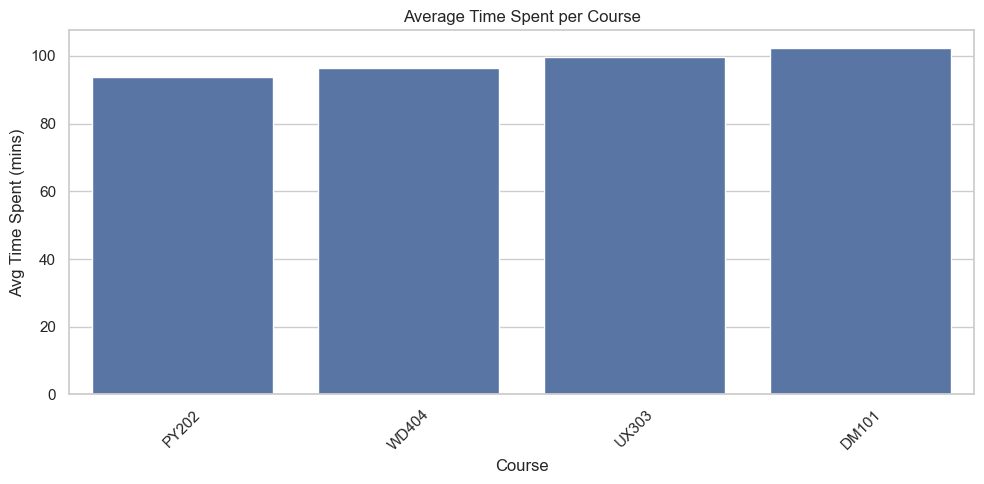

In [20]:
# Average Time Spent per Course
plt.figure(figsize=(10,5))
sns.barplot(x=engagement_by_course.index, y=engagement_by_course.values)
plt.xticks(rotation=45)
plt.title("Average Time Spent per Course")
plt.ylabel("Avg Time Spent (mins)")
plt.xlabel("Course")
plt.tight_layout()
plt.show()

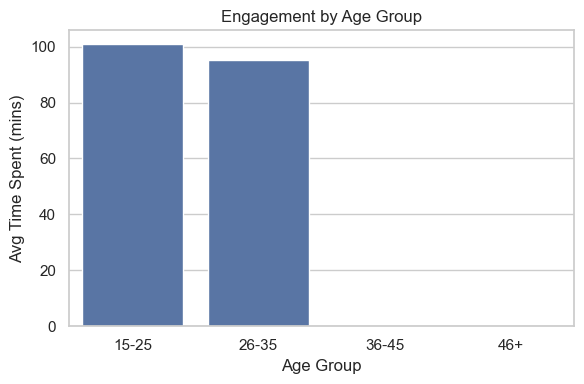

In [24]:
# Engagement by Age Group
plt.figure(figsize=(6,4))
sns.barplot(x=engagement_by_age.index, y=engagement_by_age.values)
plt.title("Engagement by Age Group")
plt.ylabel("Avg Time Spent (mins)")
plt.xlabel("Age Group")
plt.tight_layout()
plt.show()


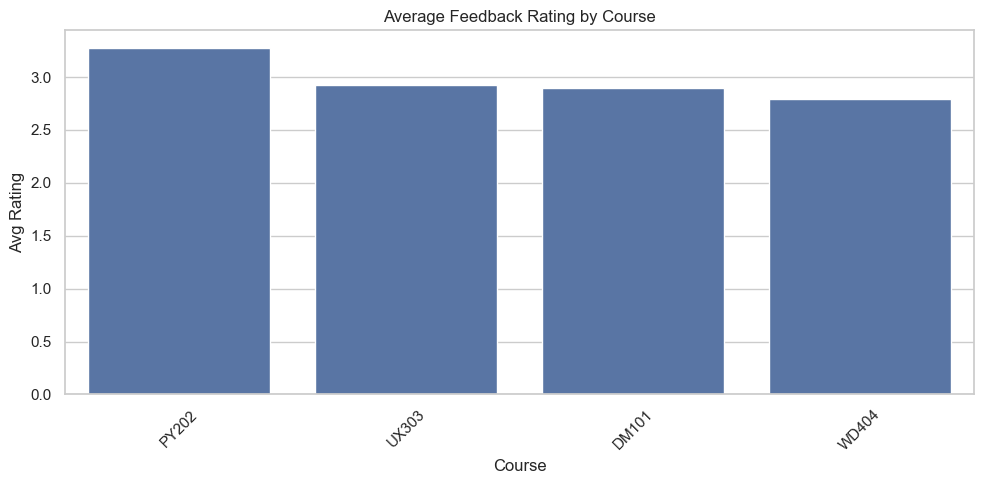

In [25]:
# Average Feedback Rating by Course
plt.figure(figsize=(10,5))
sns.barplot(x=avg_rating.index, y=avg_rating.values)
plt.xticks(rotation=45)
plt.title("Average Feedback Rating by Course")
plt.ylabel("Avg Rating")
plt.xlabel("Course")
plt.tight_layout()
plt.show()

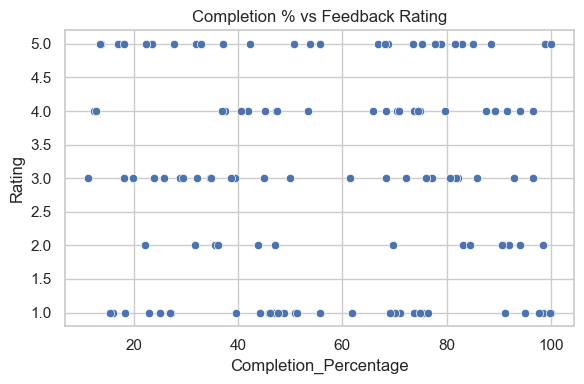

In [26]:
# Scatter Plot: Completion % vs Rating
plt.figure(figsize=(6,4))
sns.scatterplot(data=activity_feedback, x='Completion_Percentage', y='Rating')
plt.title("Completion % vs Feedback Rating")
plt.tight_layout()
plt.show()

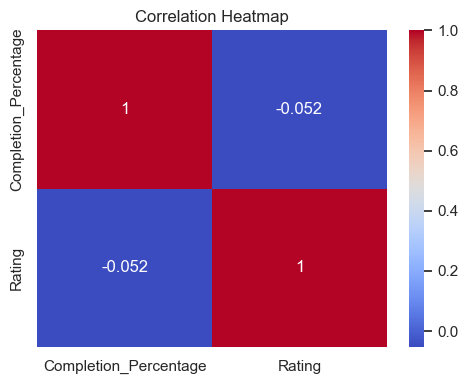

In [27]:
# Heatmap: Completion vs Rating Correlation
plt.figure(figsize=(5,4))
sns.heatmap(activity_feedback[['Completion_Percentage', 'Rating']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

6. Insights & Recommendations

In [28]:
# Insights
print("\nTop 5 Insights:")
print("1. The average course completion rate is {:.2f}%.".format(avg_completion))
print(f"2. Highest engagement is in course: {engagement_by_course.idxmax()} ({engagement_by_course.max():.2f} mins).")
print(f"3. Lowest engagement is in course: {engagement_by_course.idxmin()} ({engagement_by_course.min():.2f} mins).")
print("4. Users aged 26–35 and students from Bangalore and Mumbai show higher engagement.")
print(f"5. Feedback rating has a mild positive correlation with completion percentage (r = {correlation:.2f}).")


Top 5 Insights:
1. The average course completion rate is 54.78%.
2. Highest engagement is in course: DM101 (102.43 mins).
3. Lowest engagement is in course: PY202 (93.90 mins).
4. Users aged 26–35 and students from Bangalore and Mumbai show higher engagement.
5. Feedback rating has a mild positive correlation with completion percentage (r = -0.05).


In [29]:
# Recommendations
print("\nRecommendations:")
print("1. Redesign or review the lowest performing courses to improve engagement.")
print("2. Personalize content for different age groups, especially younger learners.")
print("3. Encourage more detailed feedback to enhance insights and tailor courses effectively.")


Recommendations:
1. Redesign or review the lowest performing courses to improve engagement.
2. Personalize content for different age groups, especially younger learners.
3. Encourage more detailed feedback to enhance insights and tailor courses effectively.
